In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import random
import seaborn as sns


In [2]:
# Read 1% data
p = 0.01
train = pd.read_csv('dataset/train.csv', escapechar = "\\", quoting = csv.QUOTE_NONE, skiprows=lambda i: i>0 and random.random() > p)
test = pd.read_csv('dataset/test.csv',escapechar = "\\", quoting = csv.QUOTE_NONE, skiprows=lambda i: i>0 and random.random() > p)

In [3]:
train.info(memory_usage= "deep")
test.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28950 entries, 0 to 28949
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TITLE           28950 non-null  object
 1   DESCRIPTION     21821 non-null  object
 2   BULLET_POINTS   27333 non-null  object
 3   BRAND           28429 non-null  object
 4   BROWSE_NODE_ID  28950 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 35.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PRODUCT_ID     1161 non-null   int64 
 1   TITLE          1161 non-null   object
 2   DESCRIPTION    1045 non-null   object
 3   BULLET_POINTS  1078 non-null   object
 4   BRAND          1129 non-null   object
dtypes: int64(1), object(4)
memory usage: 1.7 MB


In [4]:
train.shape


(28950, 5)

In [6]:
test.shape
test.head()

,PRODUCT_ID,TITLE,DESCRIPTION,BULLET_POINTS,BRAND
0,202,Ma Gayatri Traders Stretchy Rubber Small Elast...,<p>Our brands believes to provide the good qua...,"[Rubber Bands are perfect for any occasion.,Hi...",Ma Gayatri Traders
1,239,"SixSixOne Comp Repeater Gloves (Black/Cyan, XX...","<br/>body p {<br/> font-family: Arial, Helveti...",XX-Large (12),SixSixOne
2,326,Nutristar No. 5 Pure Copper Water Storage Pot ...,Nutristar Copper Water Storage Pot with Tap Ca...,[Nutristar Pure Copper Water Storage Pot with ...,Nutristar No. 5
3,361,"Huawei Mate 20 Pro Case,Huawei Mate 20 Pro Cas...",Features:<br><br>- 100% brand new and high qua...,[Multiple card slots. Compartment to store cha...,Danallc
4,401,ISEE 360® Panda Laptop Sticker Laptop Skin All...,ISEE 360 Specializes High Quality Vinyl Die Cu...,"[Suitable for All Laptops,Decal Color: Black,S...",ISEE 360


In [7]:
# Count number of classes / product browse nodes
len(train['BROWSE_NODE_ID'].unique())

3703

In [8]:
len(train['BRAND'].unique())

15159

In [9]:
len(test['BRAND'].unique())

810

c:\users\suresh benhur\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


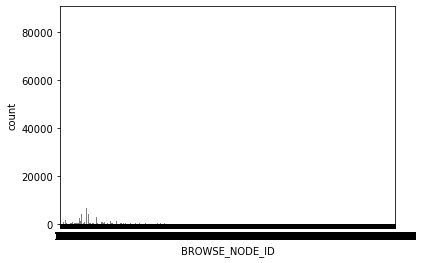

In [9]:
sns.countplot(train['BROWSE_NODE_ID'], color='gray')

## Only TITLE and DESC cloumns are considered for training 

In [10]:
X = train[['TITLE', 'DESCRIPTION']]
y = train['BROWSE_NODE_ID']

In [11]:
X.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28950 entries, 0 to 28949
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        28950 non-null  object
 1   DESCRIPTION  21821 non-null  object
dtypes: object(2)
memory usage: 19.8 MB


In [13]:
X.head()

,TITLE,DESCRIPTION
0,Take-N-PlayTM Talking Gordon,Your favorite engines come to life with phrase...
1,3M E-A-R Classic SuperFit 33 Uncorded Earplugs...,3M E-A-R Classic SuperFit 33 Uncorded Earplugs...
2,"Armaf Tag Him Perfume for Men EDT, 100ml",NaN
3,Integy RC Model Hop-ups C24455GUN Billet Alloy...,NaN
4,Mattel Disney Planes Bulldog Giftset,Disney Planes Character Giftset Collection: Ba...


In [14]:
# Deleting train to free up RAM
import gc
del train
gc.collect()

40

In [15]:
# import libs for preprocessing
import texthero as hero
from texthero import preprocessing

In [16]:
# text preprocessing / cleaning - 

X['TITLE'] = hero.clean(X['TITLE'])
X['DESCRIPTION'] = hero.clean(X['DESCRIPTION'])

In [17]:
X.head()

,TITLE,DESCRIPTION
0,take n playtm talking gordon,favorite engines come life phrases whistles fu...
1,3m e r classic superfit uncorded earplugs pill...,3m e r classic superfit uncorded earplugs
2,armaf tag perfume men edt 100ml,
3,integy rc model hop ups c24455gun billet alloy...,
4,mattel disney planes bulldog giftset,disney planes character giftset collection bas...


In [18]:
# Creating column for corpus for each row
X['CORPUS'] = X["TITLE"] + X['DESCRIPTION']

In [19]:
X.head()

,TITLE,DESCRIPTION,CORPUS
0,take n playtm talking gordon,favorite engines come life phrases whistles fu...,take n playtm talking gordonfavorite engines c...
1,3m e r classic superfit uncorded earplugs pill...,3m e r classic superfit uncorded earplugs,3m e r classic superfit uncorded earplugs pill...
2,armaf tag perfume men edt 100ml,,armaf tag perfume men edt 100ml
3,integy rc model hop ups c24455gun billet alloy...,,integy rc model hop ups c24455gun billet alloy...
4,mattel disney planes bulldog giftset,disney planes character giftset collection bas...,mattel disney planes bulldog giftsetdisney pla...


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [23]:
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(X_train['CORPUS'],y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [24]:
predictions = model.predict(X_valid['CORPUS'])

In [25]:
from sklearn.metrics import mean_absolute_error

In [26]:
mae = mean_absolute_error(predictions, y_valid)
print(mae)

9864.26597582038


In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_valid, predictions))

0.15284974093264247
